In [1]:
#############################################################################
# File: DS312_Project4_RachelNewman
# Author: Rachel Newman
# Purpose: Implement Bayesian Classifier, Logistic Regression, and KNN for 
#          the UCI Congressional Voting Records dataset.
# Resources: To load in the dataset and the column names, I referenced the 
#            photo you posted to Canvas. Everything else is my own work!
############################################################################

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Question 1
Please see attached pdf file on Canvas for answer to Question 1!

# Question 2
Please see attached pdf file on Canvas for answer to Question 2!

# Question 3: Bayesian Classifier Implementation

#### The dataset for these questions is the UCI Congressional Voting Records dataset. This 
dataset contains 435 instances of voting records and is categorical in nature. The task is t 
predict the political party (Democrat or Republican) based on 16 features representing t e
voting on key issues. Handle missing values appropriately for all questions. Use an 80 20
split for training and testing, and ensure the same split is used across all questi ns.
Dataset link: https://archive.ics.uci.edu/dataset/105/congressional+voting+records

#### Implement a Bayesian Classifier using 80% of the data for training. (Note: To implement a Bayesian Classifier using scikit-learn, you can use the GaussianNB)

In [10]:
## loading in the dataset 
df = pd.read_csv('house-votes-84.data')
print(df.shape)
df.head()

(434, 17)


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [12]:
df.columns = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
              'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 
              'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'cirme', 'duty-free-exports', 
              'export-administration-act-south-africa']
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,cirme,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


According to the UCI Congressional Voting Records website where we obtain the data, there are missing values in the dataset. When the dataset is loaded in, missing values do not show up as 'NaN' and instead are represented with '?'. I will replace these values with 'NaN' so that I can replace those with the mode values in the dataset.

In [15]:
## replacing '?' with 'NaN'
df.replace('?', np.nan, inplace=True)
df.fillna(df.mode().iloc[0], inplace = True)

In [133]:
## converting categorical variables into numerical format
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,cirme,duty-free-exports,export-administration-act-south-africa
0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
3,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
4,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


In [135]:
x = df.drop('party', axis = 1)
y = df['party']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [137]:
## implementing Bayes classifier with GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

GaussianNB()

#### Tune the model to improve its performance.

In [140]:
## hyperparameter tuning using GridSearchCV
param_grid = {}
grid_search = GridSearchCV(gaussian, param_grid, cv=5)
grid_search.fit(x_train, y_train)

## using the best estimator to imporve model performance
best_model = grid_search.best_estimator_

#### After tuning, evaluate the model on the test set using accuracy, precision, recall, and F1-score metrics. 

In [143]:
## predictions on the test set
y_pred = gaussian.predict(x_test)
y_prob = gaussian.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

# evaluating model performance 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

## printing results for Bayes Classifier
print(f'Accuracy for the Bayes Classifier on the test set is: {accuracy:.4f}')
print(f'Precision of the Bayes Classifier on the test set is: {precision:.4f}')
print(f'Recall for the Bayes Classifier on the test set is: {recall:.4f}')
print(f'F1 Score for the Bayes Classifier on the test set is: {f1:.4f}')

Accuracy for the Bayes Classifier on the test set is: 0.8851
Precision of the Bayes Classifier on the test set is: 0.8421
Recall for the Bayes Classifier on the test set is: 0.8889
F1 Score for the Bayes Classifier on the test set is: 0.8649


#### Calculate and report the ROC-AUC value on the test data.

In [146]:
## roc-auc value
roc_auc = roc_auc_score(y_test, y_prob)
print(f'The ROC-AUC value of the Bayes Classifier on the test set is: {roc_auc:.4f}')

The ROC-AUC value of the Bayes Classifier on the test set is: 0.9611


# Question 4: Logistic Regression Implementation

#### Implement a logisitic regression model using 80% of the data for testing. 

In [150]:
## creating a logistic regression model with max iterations set to 10000 so that the model can converge
N = 10000
log_reg = LogisticRegression(max_iter = N)

#### Tune the model to optimize its performance.

In [153]:
# Manual hyperparameter tuning - let's try different C values
C_values = [0.001,0.01, 0.1, 1, 10, 100]

for C in C_values:
    # Initialize the logistic regression model with specific C value (regularization strength)
    log_reg = LogisticRegression(C = C, penalty = 'l2', solver = 'liblinear', random_state = 0)
    
    # Train the model on the training data
    log_reg.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred_logreg = log_reg.predict(x_test)
    y_prob_logreg = log_reg.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

#### After tuning, evaluate the model on the test set using accuracy, precision, recall, and F1-score metrics.

In [156]:
# evaluating model performance 
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

## printing results for Logistic Regression
print(f'Accuracy for Logistic Regression on the test set is: {accuracy_logreg:.4f}')
print(f'Precision of Logisitic Regression on the test set is: {precision_logreg:.4f}')
print(f'Recall for the Logistic Regression on the test set is: {recall_logreg:.4f}')
print(f'F1 Score for the Logistic Regression on the test set is: {f1_logreg:.4f}')

Accuracy for Logistic Regression on the test set is: 0.9425
Precision of Logisitic Regression on the test set is: 0.9429
Recall for the Logistic Regression on the test set is: 0.9167
F1 Score for the Logistic Regression on the test set is: 0.9296


#### Calculate and report the ROC-AUC value on the test data.

In [159]:
## roc-auc value
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print(f'The ROC-AUC value of Logistic Regression on the test set is: {roc_auc_logreg:.4f}')

The ROC-AUC value of Logistic Regression on the test set is: 0.9616


# Question 5: K-Nearest Neighbors (KNN) Implementation

#### Implement the K-Nearest Neighbors algorithm using 80% of the data for testing.

In [163]:
## create KNN classifier model
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

#### Tune the model to optimize its performance.

In [166]:
metrics = {}
for k in range(1,26):
    # Initialize the KNN model with specific k value (number of neighbors)
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the training data
    knn.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(x_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    # Store the results for this k value
    metrics[k] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }
for k, values in metrics.items():
    print(f"k={k}: Accuracy={values['accuracy']:.4f}, Precision={values['precision']:.4f}, "
          f"Recall={values['recall']:.4f}, F1-Score={values['f1_score']:.4f}, ROC-AUC={values['roc_auc']:.4f}")

k=1: Accuracy=0.9080, Precision=0.8889, Recall=0.8889, F1-Score=0.8889, ROC-AUC=0.9052
k=2: Accuracy=0.8966, Precision=0.9655, Recall=0.7778, F1-Score=0.8615, ROC-AUC=0.8791
k=3: Accuracy=0.8736, Precision=0.8049, Recall=0.9167, F1-Score=0.8571, ROC-AUC=0.8799
k=4: Accuracy=0.9310, Precision=0.9412, Recall=0.8889, F1-Score=0.9143, ROC-AUC=0.9248
k=5: Accuracy=0.9195, Precision=0.8919, Recall=0.9167, F1-Score=0.9041, ROC-AUC=0.9191
k=6: Accuracy=0.9080, Precision=0.8889, Recall=0.8889, F1-Score=0.8889, ROC-AUC=0.9052
k=7: Accuracy=0.9080, Precision=0.8684, Recall=0.9167, F1-Score=0.8919, ROC-AUC=0.9093
k=8: Accuracy=0.8966, Precision=0.8649, Recall=0.8889, F1-Score=0.8767, ROC-AUC=0.8954
k=9: Accuracy=0.9195, Precision=0.8718, Recall=0.9444, F1-Score=0.9067, ROC-AUC=0.9232
k=10: Accuracy=0.9195, Precision=0.8718, Recall=0.9444, F1-Score=0.9067, ROC-AUC=0.9232
k=11: Accuracy=0.9195, Precision=0.8718, Recall=0.9444, F1-Score=0.9067, ROC-AUC=0.9232
k=12: Accuracy=0.9195, Precision=0.8718, 

In [167]:
## using best KNN model
KNN = KNeighborsClassifier(n_neighbors = 4)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

#### After tuning, evaluate the model on the test set using accuracy, precision, recall, and F1-score metrics.

In [171]:
## predictions on the test set
y_pred_knn = KNN.predict(x_test)
y_prob_knn = KNN.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

# evaluating model performance 
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

## printing results for KNN
print(f'Accuracy for the KNN algorithm on the test set is: {accuracy_knn:.4f}')
print(f'Precision of the KNN algorithm on the test set is: {precision_knn:.4f}')
print(f'Recall for the KNN algorithm on the test set is: {recall_knn:.4f}')
print(f'F1 Score for the KNN algorithm on the test set is: {f1_knn:.4f}')

Accuracy for the KNN algorithm on the test set is: 0.9310
Precision of the KNN algorithm on the test set is: 0.9412
Recall for the KNN algorithm on the test set is: 0.8889
F1 Score for the KNN algorithm on the test set is: 0.9143


#### Calculate and report the ROC-AUC value on the test data.

In [174]:
## roc-auc value
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f'The ROC-AUC value of the KNN algorithm on the test set is: {roc_auc_knn:.4f}')

The ROC-AUC value of the KNN algorithm on the test set is: 0.9412


# Question 6: Performance Comparison of Models

#### Compare the performance of the Bayesian classifier, Logistic Regression, and KNN models using test set.

In [178]:
## storing results of each model in a dictionary
results = {}

## Bayesian Classifier
results['Bayesian'] = {'Test Accuracy': accuracy, 'Test Precision': precision, 'Test Recall': recall, 'F1 Score': f1, 'ROC-AUC Value': roc_auc}

## Logistic Regression
results['Logistic Regression'] = {'Test Accuracy': accuracy_logreg, 'Test Precision': precision_logreg, 'Test Recall': recall_logreg, 
                                  'F1 Score': f1_logreg, 'ROC-AUC Value': roc_auc_logreg}

## KNN 
results['KNN'] = {'Test Accuracy': accuracy_knn, 'Test Precision': precision_knn, 'Test Recall': recall_knn, 
                  'F1 Score': f1_knn, 'ROC-AUC Value': roc_auc_knn}

print(results)

{'Bayesian': {'Test Accuracy': 0.9080459770114943, 'Test Precision': 0.85, 'Test Recall': 0.9444444444444444, 'F1 Score': 0.8947368421052632, 'ROC-AUC Value': 0.9133986928104575}, 'Logistic Regression': {'Test Accuracy': 0.9425287356321839, 'Test Precision': 0.9428571428571428, 'Test Recall': 0.9166666666666666, 'F1 Score': 0.9295774647887324, 'ROC-AUC Value': 0.9616013071895424}, 'KNN': {'Test Accuracy': 0.9310344827586207, 'Test Precision': 0.9411764705882353, 'Test Recall': 0.8888888888888888, 'F1 Score': 0.9142857142857143, 'ROC-AUC Value': 0.9411764705882353}}


In [180]:
## printing results in more readable fashion

## printing results for Bayes Classifier
print(f'Accuracy for the Bayes Classifier on the test set is: {accuracy:.4f}')
print(f'Precision of the Bayes Classifier on the test set is: {precision:.4f}')
print(f'Recall for the Bayes Classifier on the test set is: {recall:.4f}')
print(f'F1 Score for the Bayes Classifier on the test set is: {f1:.4f}')
print(f'The ROC-AUC value of the Bayes Classifier on the test set is: {roc_auc:.4f}\n')

## printing results for Logistic Regression
print(f'Accuracy for Logistic Regression on the test set is: {accuracy_logreg:.4f}')
print(f'Precision of Logisitic Regression on the test set is: {precision_logreg:.4f}')
print(f'Recall for the Logistic Regression on the test set is: {recall_logreg:.4f}')
print(f'F1 Score for the Logistic Regression on the test set is: {f1_logreg:.4f}')
print(f'The ROC-AUC value of Logistic Regression on the test set is: {roc_auc_logreg:.4f}\n')

## printing results for KNN
print(f'Accuracy for the KNN algorithm on the test set is: {accuracy_knn:.4f}')
print(f'Precision of the KNN algorithm on the test set is: {precision_knn:.4f}')
print(f'Recall for the KNN algorithm on the test set is: {recall_knn:.4f}')
print(f'F1 Score for the KNN algorithm on the test set is: {f1_knn:.4f}')
print(f'The ROC-AUC value of the KNN algorithm on the test set is: {roc_auc_knn:.4f}\n')

Accuracy for the Bayes Classifier on the test set is: 0.9080
Precision of the Bayes Classifier on the test set is: 0.8500
Recall for the Bayes Classifier on the test set is: 0.9444
F1 Score for the Bayes Classifier on the test set is: 0.8947
The ROC-AUC value of the Bayes Classifier on the test set is: 0.9134

Accuracy for Logistic Regression on the test set is: 0.9425
Precision of Logisitic Regression on the test set is: 0.9429
Recall for the Logistic Regression on the test set is: 0.9167
F1 Score for the Logistic Regression on the test set is: 0.9296
The ROC-AUC value of Logistic Regression on the test set is: 0.9616

Accuracy for the KNN algorithm on the test set is: 0.9310
Precision of the KNN algorithm on the test set is: 0.9412
Recall for the KNN algorithm on the test set is: 0.8889
F1 Score for the KNN algorithm on the test set is: 0.9143
The ROC-AUC value of the KNN algorithm on the test set is: 0.9412



#### Plot the ROC-AUC values for all three models on a single graph, including legends to distinguish between them.

In [183]:
## Extracting ROC-AUC values from results dictionary
models = list(results.keys())
roc_auc_values = [results[model]['ROC-AUC Value'] for model in models]

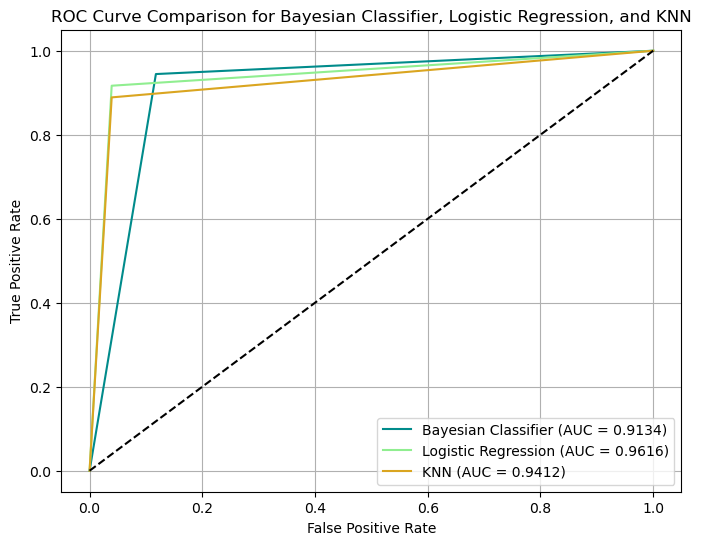

In [185]:
# Calculate ROC curve for Bayesian Classifier
fpr_bayes, tpr_bayes, _ = roc_curve(y_test, y_pred)

# Calculate ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)

# Calculate ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_bayes, tpr_bayes, label = f"Bayesian Classifier (AUC = {roc_auc:.4f})", color = 'darkcyan')
plt.plot(fpr_logreg, tpr_logreg, label = f"Logistic Regression (AUC = {roc_auc_logreg:.4f})", linestyle ='-', color = 'lightgreen')
plt.plot(fpr_knn, tpr_knn, label = f"KNN (AUC = {roc_auc_knn:.4f})", linestyle = '-', color = 'goldenrod')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Add labels and legend
plt.title('ROC Curve Comparison for Bayesian Classifier, Logistic Regression, and KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### Analyze the evaluation metrics to select the best-performing model for this dataset. Provide justification for your selection based on the results.

__Analyzation of the Evaluation Metrics:__
In order to select the best performing model, the evaulation metrics (accuracy, precision, recall, f1 score, and ROC-AUC values) will be analyzed for each model used on the UCI Congressional Voting dataset. When evaluating each model's _accuracy_, the model is evaluated on its overall correctness of its predictions on the political party (Democrat or Republican). The Bayesian Classifier model had an accuracy of 0.9080, meaning that the model was able to correctly identify the politcal party 90.8% of the time on the test data. The Logistic Regression model had an accuracy of 0.9425, meaning that the model was able to correctly identify the political party 94.25% of the time on the test data. The KNN model had an accuracy of 0.9310, meaning that the model was able to correctly identify the politcal party 93.10% of the time. When evaluating each model's _precision_, this value indicates the percentage of true positives among the total number of positive predictions. The Bayesian Classifier had a precision value of 0.85, the Logistic Regression model had a precision of 0.9429, and the KNN model had a precision value of 0.9412. When evaluating each model's _recall_, the model's ability to identify true positives is evaluated. The Bayes Classifier had a recall value of 0.9444, the Logistic Regression model had a recall of 0.9167, and the KNN model had 0.8889. When evaluating each model's _F1-score_, the harmonic mean of precision and recall is measured. The Bayes Classifier had a F1-score of 0.8947, the Logistic Regression model had a F1-score of 0.9296, and the KNN model had an F1-score of 0.9143. When evaluating each model's ROC-AUC value, a model with a higher value (closer to 1) is better able to discriminate between classes. The Bayes Classifier had a ROC-AUC value of 0.9134, the Logistic Regression model had an ROC-AUC value of 0.9616, and the KNN model had an ROC-AUC value of 0.9412. 

__Best-performing model for this dataset:__
Based off the evalulation metrics above, the best-performing model depends on what the goal of this project ultimately was. If the goal was highest precision, meaning that there were fewer fasle positives the model identified, then the best model to use for this task is the Logistic Regression model because it had the highest precision score. If the goal was recall, then the best model to use for this task would be the Bayesian Classifier because it had the highest recall value. If the goal was having a model with a balance between precision and recall, then the Logistic Regression model would be best suited for this because it had the highest F1-score. If the goal was to just evaluate the best performance, then a model with the highest ROC-AUC value generally performs better. In this case, the Logistic Regression model would be best because it has an ROC-AUC value of 0.9616.